一、导入需要的数据分析、数据处理、数据可视化工具包

In [1]:

import numpy as np    #科学计算包，以矩阵为基础

import pandas as pd   #数据处理，数据分析

import matplotlib.pyplot as plt   #数据图表


二、数据准备：加载数据集，并进行数据分析、数据处理(确实值的处理)、特征提取

2.1 读取训练集和测试集数据

In [2]:

train=pd.read_csv('/Users/ynshan/Desktop/titanic/train.csv')  

test=pd.read_csv('/Users/ynshan/Desktop/titanic/test.csv')


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


2.2 查看训练集的信息

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


训练集中共有891条记录，Age、Cabin、Embarked 存在缺失值，并且 Cabin 所缺失的数据比较多

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


训练集中，获救率约是 38.38%，平均年龄是29.7，年龄范围分布较广，船票费用差别很大

2.3 查看测试集的数据

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


测试集数据中，Age、Fare、Cabin 存在缺失值，并且 Cabin 所缺失的数据比较多。

在两个数据集中，Cabin都是缺失数据较多的列，需要谨慎处理这一列数据

2.4 利用图表进行数据分析

2.4.1 乘客的获救情况

Text(0,0.5,'Number of passengers')

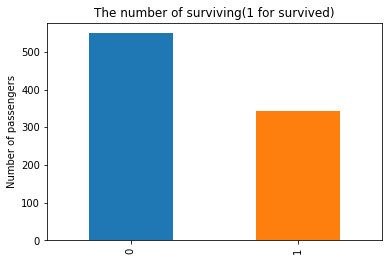

In [8]:
train.Survived.value_counts().plot(kind="bar")

plt.title("The number of surviving(1 for survived)")

plt.ylabel("Number of passengers")


2.4.2 等级对是否获救的影响

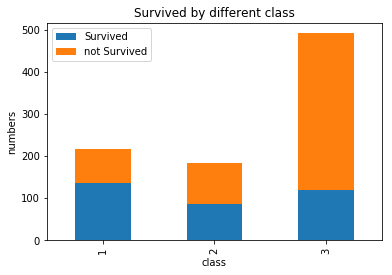

In [9]:

Survived_0=train.Pclass[train.Survived==0].value_counts()

Survived_1=train.Pclass[train.Survived==1].value_counts()

df=pd.DataFrame({'Survived':Survived_1,'not Survived':Survived_0})

df.plot(kind='bar',stacked=True)

plt.title('Survived by different class')
plt.ylabel('numbers')
plt.xlabel('class')

plt.show()


从图中可以看出，1，2等级的获救率较高，第3等级的人数最多，但获救率最低，可以判断Pclass是一个影响特征

2.4.3 性别对是否获救的影响

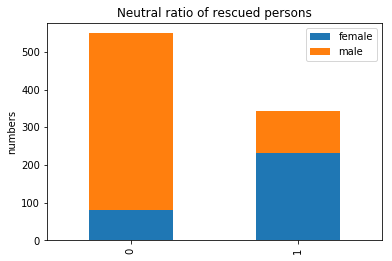

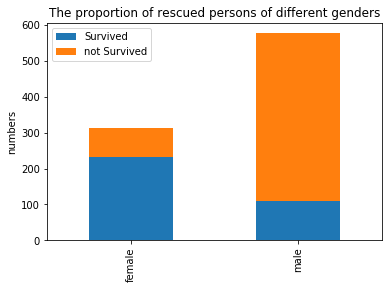

In [10]:
#获救人员中性别的比例
Survived_m=train.Survived[train.Sex=='male'].value_counts()
Survived_f=train.Survived[train.Sex=='female'].value_counts()
df=pd.DataFrame({'female':Survived_f,'male':Survived_m})

df.plot(kind='bar',stacked=True) #堆叠图
plt.title('Neutral ratio of rescued persons')
plt.ylabel('numbers')


#不同性别中获救人员的占比
Survived_0=train.Sex[train.Survived==0].value_counts()
Survived_1=train.Sex[train.Survived==1].value_counts()
df=pd.DataFrame({'not Survived':Survived_0,'Survived':Survived_1})

df.plot(kind='bar',stacked=True) #堆叠图
plt.title('The proportion of rescued persons of different genders')
plt.ylabel('numbers')


plt.show()


在获救的人当中，女性所占的比例较高，女性获救的概率占全部获救人员的68%

在所有的女性当中，有74.2%的人获救，所以性别是一个非常重要的特征

2.4.4 等级和性别 对是否获救的影响

1，2等级看作是 high class，3等级视为 low calss

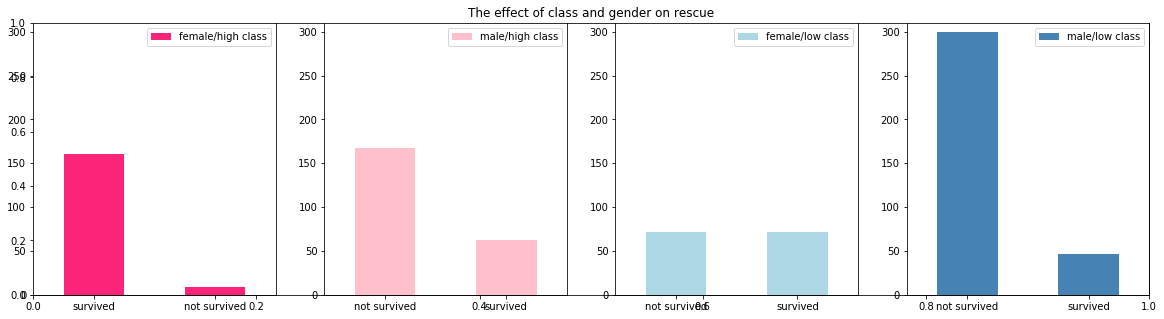

In [11]:

fig=plt.figure(figsize=(20,5))
fig.set(alpha=0.65) #设定图表颜色参数
plt.title('The effect of class and gender on rescue')

ax1=fig.add_subplot(141)
S1=train.Survived[train.Sex=='female'][train.Pclass!=3].value_counts()
S1.plot(kind='bar',label="female highclass",color='#FA2479')
ax1.set_ylim(0,310)
ax1.set_xticklabels(['survived','not survived'],rotation=0)
ax1.legend(['female/high class'],loc='best')

ax2=fig.add_subplot(142)
S2=train.Survived[train.Sex=='male'][train.Pclass!=3].value_counts()
S2.plot(kind='bar',label='male highclass',color='pink')
ax2.set_ylim(0,310)
ax2.set_xticklabels(['not survived','survived'],rotation=0)
ax2.legend(['male/high class'],loc='best')

ax3=fig.add_subplot(143)
S3=train.Survived[train.Sex=='female'][train.Pclass==3].value_counts()
S3.plot(kind='bar',label='female lowclass',color='lightblue')
ax3.set_ylim(0,310)
ax3.set_xticklabels(['not survived','survived'],rotation=0)
ax3.legend(['female/low class'],loc='best')

ax4=fig.add_subplot(144)
S4=train.Survived[train.Sex=='male'][train.Pclass==3].value_counts()
S4.plot(kind='bar',label='male lowclass',color='steelblue')
ax4.set_ylim(0,310)
ax4.set_xticklabels(['not survived','survived'],rotation=0)
ax4.legend(['male/low class'],loc='best')

plt.show()


从图中可以看出，高等级的女性有极高的获救率，第三等级的男性获救率最低，这里进一步说明了性别和等级的重要性。

2.4.5 不同等级的小孩子存活情况

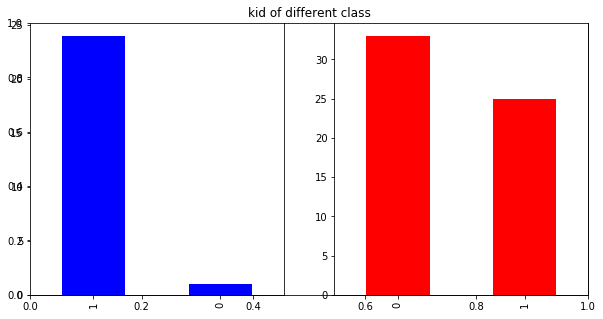

In [12]:

fig=plt.figure(figsize=(10,5))
fig.set(alpha=0.2)
plt.title('kid of different class')

axs1=fig.add_subplot(121)
kid_1=train.Survived[train.Age<=15][train.Pclass!=3].value_counts()
kid_1.plot(kind='bar',label='class high',color="blue")
ax1.set_xticklabels(['survived','not survived'],rotation=0)
ax1.legend(['class high'],loc='best')

axs2=fig.add_subplot(122)
kid_2=train.Survived[train.Age<=15][train.Pclass==3].value_counts()
kid_2.plot(kind='bar',label='class low',color='red')
ax2.set_xticklabels([' notsurvived','survived'],rotation=0)
ax2.legend(['class low'],loc='best')

plt.show()


1，2等级的小孩几乎全部存活，第3等级获救率则较低，说明了年龄和等级对是否获救的影响

2.4.6 不同港口对是否获救的影响

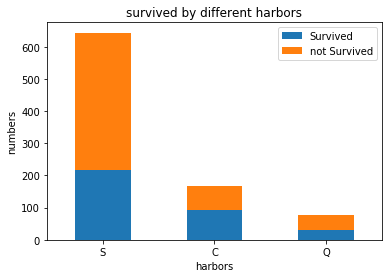

In [13]:

fig=plt.figure()
fig.set(alpha=0.2)

Survived_0=train.Embarked[train.Survived==0].value_counts()
Survived_1=train.Embarked[train.Survived==1].value_counts()
df=pd.DataFrame({'Survived':Survived_1,'not Survived':Survived_0})
df.plot(kind='bar',stacked=True)
plt.title('survived by different harbors')
plt.xlabel('harbors')
plt.ylabel('numbers')
plt.xticks(rotation=360)

plt.show()


各港口的获救比例没有特别大的差异，所以忽略 Embarked 因素

2.4.7 有无船舱号与等级的关系

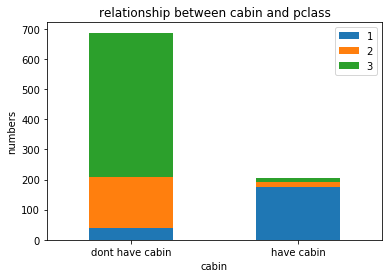

In [14]:

fig=plt.figure()
fig.set(alpha=0.2)

Pclass_cabin=train.Pclass[train.Cabin.notnull()].value_counts()
Pclass_nocabin=train.Pclass[train.Cabin.isnull()].value_counts()

df=pd.DataFrame({'have cabin':Pclass_cabin,'dont have cabin':Pclass_nocabin}).transpose()

df.plot(kind='bar',stacked=True)
plt.title('relationship between cabin and pclass')
plt.xlabel('cabin')
plt.ylabel('numbers')
plt.xticks(rotation=360)
plt.show()


拥有船舱号的人绝大部分是第1等级的人，所以船舱号的有无和等级有很大的相关性

2.4.8 有无船舱号对是否获救的影响

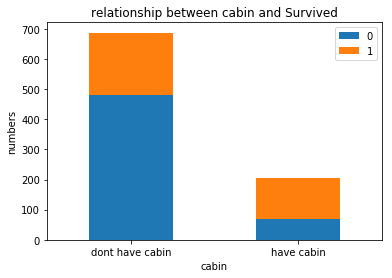

In [15]:
fig=plt.figure()
fig.set(alpha=0.2)

Survived_cabin=train.Survived[train.Cabin.notnull()].value_counts()
Survived_nocabin=train.Survived[train.Cabin.isnull()].value_counts()

df=pd.DataFrame({'have cabin':Survived_cabin,'dont have cabin':Survived_nocabin}).transpose()

df.plot(kind='bar',stacked=True)
plt.title('relationship between cabin and Survived')
plt.xlabel('cabin')
plt.ylabel('numbers')
plt.xticks(rotation=360)
plt.show()


有船舱号获救率较高，由于船舱号的缺失值较多，并且与等级的相关性较大，所以删去此列

2.4.9 家庭成员数量对是否获救的影响

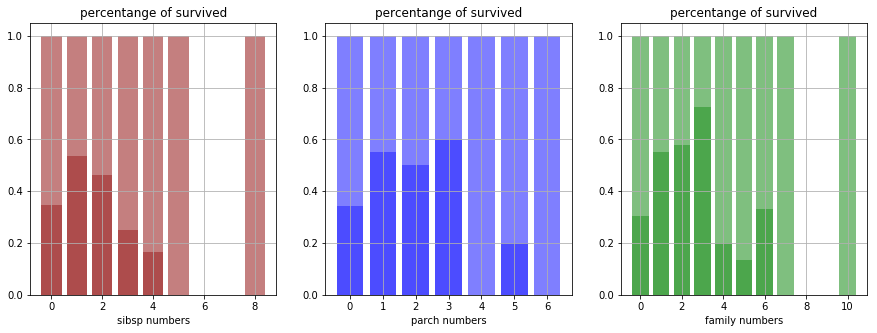

In [16]:
df_sibsp=pd.crosstab(train.SibSp,train.Survived).apply(lambda r: r/r.sum(), axis=1)
df_parch=pd.crosstab(train.Parch,train.Survived).apply(lambda r: r/r.sum(), axis=1)

train['family']=train['SibSp']+train['Parch']
df_family=pd.crosstab(train.family,train.Survived).apply(lambda r: r/r.sum(), axis=1)

fig=plt.figure(figsize=(15,5))

ax1=fig.add_subplot(131)
ax1.bar(df_sibsp.index,df_sibsp[1],color = 'darkred',alpha=0.7)
ax1.bar(df_sibsp.index,df_sibsp[0],color = 'darkred',bottom = df_sibsp[1],alpha=0.5)
ax1.grid(True)
ax1.set_title('percentange of survived')
ax1.set_xlabel('sibsp numbers')

ax2=fig.add_subplot(132)
ax2.bar(df_parch.index,df_parch[1],color = 'blue',alpha=0.7)
ax2.bar(df_parch.index,df_parch[0],color = 'blue',bottom = df_parch[1],alpha=0.5)
ax2.grid(True)
ax2.set_title('percentange of survived')
ax2.set_xlabel('parch numbers')

ax3=fig.add_subplot(133)
ax3.bar(df_family.index,df_family[1],color = 'green',alpha=0.7)
ax3.bar(df_family.index,df_family[0],color = 'green',bottom = df_family[1],alpha=0.5)
ax3.grid(True)
ax3.set_title('percentange of survived')
ax3.set_xlabel('family numbers')

test['family']=test['SibSp']+test['Parch']


有1-3个家庭成员的存活率较高，所以把 SibSp 和 Parch 合为 family 列，作为特征考虑

2.5 数据处理

2.5.1 删除 无关的列

In [17]:
train = train.drop(['PassengerId','Cabin','Embarked','Ticket'], axis=1)

test = test.drop(['Cabin','Embarked','Ticket'], axis=1)

2.5.2 补充测试集中 Fare 的缺失值

查看缺失值信息

In [18]:
test.loc[(test.Fare.isnull()),:]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,family
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,NaN,0


In [19]:
#求第3等级的票价均值

fare_mean = test.Fare[test.Pclass == 3].mean()

#将缺失值填补为平均值

test.loc[(test.Fare.isnull()), 'Fare'] = fare_mean

缺失值来自于第三等级，所以用第三等级的平均值来代替

2.5.3 补充 Age 的缺失值

查看各等级年龄的密度分布

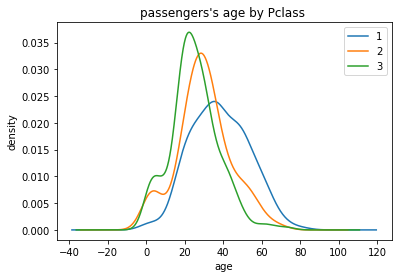

In [20]:

train.Age[train.Pclass==1].plot(kind="kde")
train.Age[train.Pclass==2].plot(kind="kde")
train.Age[train.Pclass==3].plot(kind="kde") 
plt.xlabel("age")
plt.ylabel("density")  
plt.title("passengers's age by Pclass ")
plt.legend(("1","2","3"),loc="best") 

plt.show()

In [21]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,family
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,0


提取姓名中的称谓

In [22]:
train['Title']=train.Name.str.extract('([A-Za-z]+)\.') #提取点号之前的全部字母字符串

train.Title.value_counts()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Mme           1
Jonkheer      1
Ms            1
Sir           1
Don           1
Lady          1
Countess      1
Capt          1
Name: Title, dtype: int64

In [23]:
train['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                    ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Mr'],inplace=True)
train=train.drop(['Name'],axis=1)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,family,Title
0,0,3,male,22.0,1,0,7.2500,1,Mr
1,1,1,female,38.0,1,0,71.2833,1,Mrs
2,1,3,female,26.0,0,0,7.9250,0,Miss
3,1,1,female,35.0,1,0,53.1000,1,Mrs
4,0,3,male,35.0,0,0,8.0500,0,Mr


对测试集做相同的处理

In [24]:
test['Title']=test.Name.str.extract('([A-Za-z]+)\.')

test.Title.value_counts()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

In [25]:
test['Title'].replace(['Dr','Col','Rev','Dona','Ms'],['Mr','Mr','Mr','Mrs','Miss'],inplace=True)

test=test.drop(['Name'],axis=1)

test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,family,Title
0,892,3,male,34.5,0,0,7.8292,0,Mr
1,893,3,female,47.0,1,0,7.0000,1,Mrs
2,894,2,male,62.0,0,0,9.6875,0,Mr
3,895,3,male,27.0,0,0,8.6625,0,Mr
4,896,3,female,22.0,1,1,12.2875,2,Mrs


将分类变量转化为虚拟变量

In [26]:
dummies_Pclass = pd.get_dummies(train['Pclass'],prefix='Pclass')  #prefix：前缀
dummies_Sex = pd.get_dummies(train['Sex'],prefix="Sex")
dummies_Title = pd.get_dummies(train['Title'],prefix='Title')

train_df = pd.concat([train,dummies_Pclass,dummies_Sex,dummies_Title],axis=1) #合并
train_df.drop(['Pclass','Sex','Title','SibSp','Parch'],axis=1,inplace=True)
train_df.head()

,Survived,Age,Fare,family,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,0,22.0,7.2500,1,0,0,1,0,1,0,0,1,0
1,1,38.0,71.2833,1,1,0,0,1,0,0,0,0,1
2,1,26.0,7.9250,0,0,0,1,1,0,0,1,0,0
3,1,35.0,53.1000,1,1,0,0,1,0,0,0,0,1
4,0,35.0,8.0500,0,0,0,1,0,1,0,0,1,0


In [27]:
dummies_Pclass = pd.get_dummies(test['Pclass'],prefix='Pclass')  #prefix：前缀
dummies_Sex = pd.get_dummies(test['Sex'],prefix="Sex")
dummies_Title = pd.get_dummies(test['Title'],prefix='Title')

test_df = pd.concat([test,dummies_Pclass,dummies_Sex,dummies_Title],axis=1) #合并
test_df.drop(['Pclass','Sex','Title','SibSp','Parch'],axis=1,inplace=True)
test_df.head()

,PassengerId,Age,Fare,family,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,892,34.5,7.8292,0,0,0,1,0,1,0,0,1,0
1,893,47.0,7.0000,1,0,0,1,1,0,0,0,0,1
2,894,62.0,9.6875,0,0,1,0,0,1,0,0,1,0
3,895,27.0,8.6625,0,0,0,1,0,1,0,0,1,0
4,896,22.0,12.2875,2,0,0,1,1,0,0,0,0,1


利用线性回归模型填补年龄的缺失值

In [28]:
from sklearn.linear_model import LinearRegression

def set_missing_age(df):
    
    
    # 乘客分成已知年龄和未知年龄两部分
    known_age = df[df.Age.notnull()].values
    unknown_age = df[df.Age.isnull()].values
    
    # y即目标年龄
    y = known_age[:, 1] #取所有行的第0列

    # X即特征属性值
    x = known_age[:, 2:] #所有行以及从第1列到最后一列
    
    lr = LinearRegression(fit_intercept = True,normalize = False,copy_X = True,n_jobs = 1 )
    
    lr.fit(x,y)
    
    # 用得到的模型进行未知年龄结果预测
    predictedAges = lr.predict(unknown_age[:, 2:]) #切片

    # 用得到的预测结果填补原缺失数据
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges  #loc基于标签的，按标签进行选择

    return df, lr

train_df,lr = set_missing_age(train_df)
    
test_df,lr = set_missing_age(test_df)    


In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived        891 non-null int64
Age             891 non-null float64
Fare            891 non-null float64
family          891 non-null int64
Pclass_1        891 non-null uint8
Pclass_2        891 non-null uint8
Pclass_3        891 non-null uint8
Sex_female      891 non-null uint8
Sex_male        891 non-null uint8
Title_Master    891 non-null uint8
Title_Miss      891 non-null uint8
Title_Mr        891 non-null uint8
Title_Mrs       891 non-null uint8
dtypes: float64(2), int64(2), uint8(9)
memory usage: 35.8 KB


In [30]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId     418 non-null int64
Age             418 non-null float64
Fare            418 non-null float64
family          418 non-null int64
Pclass_1        418 non-null uint8
Pclass_2        418 non-null uint8
Pclass_3        418 non-null uint8
Sex_female      418 non-null uint8
Sex_male        418 non-null uint8
Title_Master    418 non-null uint8
Title_Miss      418 non-null uint8
Title_Mr        418 non-null uint8
Title_Mrs       418 non-null uint8
dtypes: float64(2), int64(2), uint8(9)
memory usage: 16.8 KB


年龄的缺失值已经补充完成

至此，数据以处理完毕

三、选择合适的模型对数据集进行训练，并对测试集进行预测

3.1 LogisticRegression模型

3.1.1 训练模型，并对测试集做预测

In [31]:
from sklearn.linear_model import LogisticRegression

X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]

X_test  = test_df.drop("PassengerId", axis=1).copy()

lr = LogisticRegression(C=1.0,penalty='l1',tol=1e-6)

lr.fit(X_train, Y_train)

Y_pred = lr.predict(X_test)

result = pd.DataFrame({'PassengerId':test['PassengerId'].as_matrix(), 'Survived':Y_pred.astype(np.int32)})

result.to_csv("Survived_Prediction_LR.csv",index=False)


3.1.2相关系数、模型得分、交叉验证和拟合情况分析

各特征与被解释变量的相关系数

In [32]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(lr.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
8,Title_Master,2.556757
6,Sex_female,2.350716
3,Pclass_1,1.195966
11,Title_Mrs,0.844136
1,Fare,0.004313
4,Pclass_2,0.000000
7,Sex_male,0.000000
9,Title_Miss,0.000000
0,Age,-0.030538
2,family,-0.456929


模型的得分

In [33]:
acc_log = round(lr.score(X_train, Y_train) * 100, 2)
acc_log

83.16

对模型做交叉验证

In [34]:
from sklearn import cross_validation

lr = LogisticRegression(C=1.0,penalty='l1',tol=1e-6)

X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]

print (cross_validation.cross_val_score(lr,X_train,Y_train,cv=5)) #cv表示不同的交叉验证方法

[0.83798883 0.83240223 0.79775281 0.80337079 0.86440678]


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


画出学习曲线，看模型是否存在过拟合现象

In [35]:
from sklearn.model_selection import learning_curve


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
    
    plt.xlabel("Training samples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                                                            train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")

    plt.legend(loc="best")
    
    return plt


LogisticRegression的学习曲线

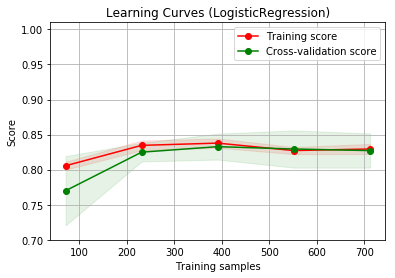

In [36]:
X,y = X_train,Y_train

title = "Learning Curves (LogisticRegression)"

cv = 5

estimator = lr

plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

从图中可以看出，不存在过拟合现象

3.1.2模型优化

在数据分析的过程中，发现1，2等级的女性存活率较高，并且小孩的存活率也非常高，从这两点出发，尝试对模型做出优化

将年龄小于14.5岁的标记为儿童,值为1

In [37]:
train_add = train_df
test_add = test_df

train_add['ischild'] = 0
train_add.loc[train_add['Age'] <= 14.5,'ischild'] = 1

test_add['ischild'] = 0
test_add.loc[test_add['Age'] <= 14.5,'ischild'] = 1

将1，2等级的女性记为1，class_high_female 列

In [38]:
train_add['class_high_female'] = 0
train_add.loc[(train_add.Pclass_1 == 1) | (train_add.Pclass_2 == 1) & (train_add.Sex_female == 1)] = 1

test_add['class_high_female'] = 0
test_add.loc[(test_add.Pclass_1 == 1) | (test_add.Pclass_2 == 1) & (test_add.Sex_female == 1)] = 1

In [39]:
train_add.head()

,Survived,Age,Fare,family,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,ischild,class_high_female
0,0,22.0,7.250,1,0,0,1,0,1,0,0,1,0,0,0
1,1,1.0,1.000,1,1,1,1,1,1,1,1,1,1,1,1
2,1,26.0,7.925,0,0,0,1,1,0,0,1,0,0,0,0
3,1,1.0,1.000,1,1,1,1,1,1,1,1,1,1,1,1
4,0,35.0,8.050,0,0,0,1,0,1,0,0,1,0,0,0


In [40]:
test_add.head()

,PassengerId,Age,Fare,family,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,ischild,class_high_female
0,892,34.5,7.8292,0,0,0,1,0,1,0,0,1,0,0,0
1,893,47.0,7.0000,1,0,0,1,1,0,0,0,0,1,0,0
2,894,62.0,9.6875,0,0,1,0,0,1,0,0,1,0,0,0
3,895,27.0,8.6625,0,0,0,1,0,1,0,0,1,0,0,0
4,896,22.0,12.2875,2,0,0,1,1,0,0,0,0,1,0,0


更新特征后重新做分析预测

In [41]:
X_train1 = train_add.drop("Survived", axis=1)
Y_train1 = train_add["Survived"]

X_test1  = test_add.drop("PassengerId", axis=1).copy()

lr = LogisticRegression(C=1.0,penalty='l1',tol=1e-6)

lr.fit(X_train1, Y_train1)

Y_pred = lr.predict(X_test1)


In [42]:
#相关系数
coeff_add = pd.DataFrame(train_add.columns.delete(0))
coeff_add.columns = ['Feature']
coeff_add["Correlation"] = pd.Series(lr.coef_[0])

coeff_add.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
8,Title_Master,2.815573
11,Title_Mrs,1.485371
6,Sex_female,1.322616
3,Pclass_1,1.058219
9,Title_Miss,0.196047
12,ischild,0.089866
1,Fare,0.018550
4,Pclass_2,0.000000
5,Pclass_3,0.000000
13,class_high_female,0.000000


In [44]:
#模型得分
acc_log = round(lr.score(X_train1, Y_train1) * 100, 2)
acc_log

89.56

In [45]:
from sklearn import cross_validation

print (cross_validation.cross_val_score(lr,X_train1,Y_train1,cv=5)) #cv表示不同的交叉验证方法

[0.86592179 0.87150838 0.88826816 0.89830508 0.92655367]


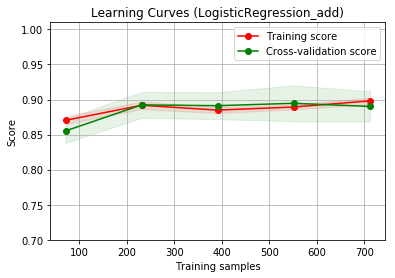

In [46]:
X,y = X_train1,Y_train1

title = "Learning Curves (LogisticRegression_add)"

cv = 5

estimator = lr

plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

增加了两个特征之后，模型的得分有了提高

3.2 Support Vector Machine

In [47]:

X_train = train_df.iloc[:,1:].values
y = train_df.iloc[:,0].values

X_test = test_df.iloc[:,1:].values


# 特征标准化
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [48]:
from sklearn.svm import SVC

classifier = SVC(probability=True)

classifier.fit(X_train, y)

prediction = classifier.predict(X_test)


In [49]:
print (cross_validation.cross_val_score(classifier,X_train,y,cv=5)) #cv表示不同的交叉验证方法

[0.87150838 0.87709497 0.89385475 0.89265537 0.92090395]


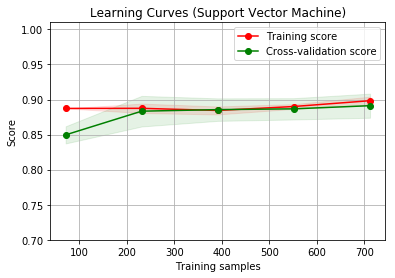

In [50]:
X,y = X_train,y

title = "Learning Curves (Support Vector Machine)"

cv = 5

estimator = classifier

plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

模型出现了严重的过拟合现象，所以接下来对参数稍作调整

In [51]:
classifier = SVC(C=0.9,probability=True)

classifier.fit(X_train, y)

prediction = classifier.predict(X_test)

result = pd.DataFrame({'PassengerId':test['PassengerId'].as_matrix(), 'Survived':prediction.astype(np.int32)})

In [52]:
print (cross_validation.cross_val_score(classifier,X_train,y,cv=5)) #cv表示不同的交叉验证方法

[0.87709497 0.88268156 0.88826816 0.89265537 0.91525424]


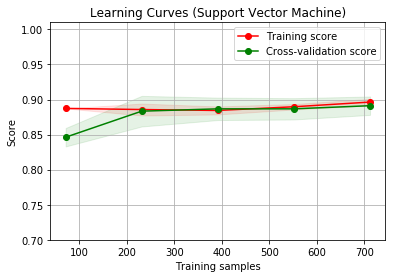

In [53]:
X,y = X_train,y

title = "Learning Curves (Support Vector Machine)"

cv = 5

estimator = classifier

plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

In [54]:
模型出现过拟合现象，可能是惩罚系数过高，在降低了惩罚系数之后，解决了过拟合问题，模型得分比LogisticRegression高

SyntaxError: invalid character in identifier (<ipython-input-54-acf3f09a1021>, line 1)

3.3 Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

classifier_1 = RandomForestClassifier()

classifier_1.fit(X_train, y)

prediction = classifier_1.predict(X_test)


In [56]:
print (cross_validation.cross_val_score(classifier_1,X_train,y,cv=5)) #cv表示不同的交叉验证方法

[0.8603352  0.86592179 0.89944134 0.84745763 0.9039548 ]


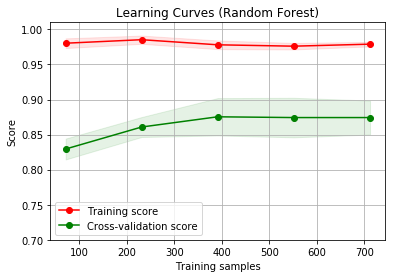

In [57]:
X,y = X_train,y

title = "Learning Curves (Random Forest)"

cv = 5

estimator = classifier_1

plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

随机森林出现和支持向量机一样的过拟合现象，接下来还是对模型的参数进行调整

In [58]:
classifier_1 = RandomForestClassifier(n_estimators=2,criterion='gini',max_features='log2')

classifier_1.fit(X_train, y)

prediction = classifier_1.predict(X_test)

In [59]:
print (cross_validation.cross_val_score(classifier_1,X_train,y,cv=5))

[0.84357542 0.87150838 0.88268156 0.83615819 0.88700565]


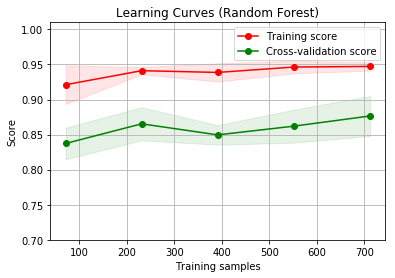

In [60]:
X,y = X_train,y

title = "Learning Curves (Random Forest)"

cv = 5

estimator = classifier_1

plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

调整参数后，过拟合现象减弱，模型的的总体得分有所下降，但是效果仍然不错。